In [40]:
"" !pip install keras-preprocessing""


In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = r"path\dataset\train"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(128,128),
                                                        class_mode='binary',
                                                        batch_size=32)

Found 2800 images belonging to 2 classes.


In [ ]:
VALIDATION_DIR = r"path\dataset\valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(128,128),
                                                              class_mode='binary',
                                                              batch_size=15)

Found 200 images belonging to 2 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')   # Use 2 units if you have binary classification with softmax
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',      # or categorical_crossentropy if labels are one-hot
              metrics=['accuracy'])

# CSV logger
csv_logger = tf.keras.callbacks.CSVLogger('training_log1.csv', append=True)

# Fit the model (replace train_data and val_data with your actual datasets)
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    callbacks=[csv_logger])



D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 54s 581ms/step - accuracy: 0.5880 - loss: 0.6804 - val_accuracy: 0.6200 - val_loss: 0.6789
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 275ms/step - accuracy: 0.6827 - loss: 0.5927 - val_accuracy: 0.5950 - val_loss: 0.7682
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.6887 - loss: 0.5904 - val_accuracy: 0.6450 - val_loss: 0.6134
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 281ms/step - accuracy: 0.7436 - loss: 0.5395 - val_accuracy: 0.6950 - val_loss: 0.6158
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 283ms/step - accuracy: 0.7191 - loss: 0.5550 - val_accuracy: 0.7250 - val_loss: 0.5412
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 282ms/step - accuracy: 0.7427 - loss: 0.5326 - val_accuracy: 0.6900 - val_loss: 0.6232
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 25s 279ms/step - accuracy: 0.7437 - loss: 0.5350 - val_accuracy: 0.7550 - val_loss: 0.5265
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 278ms/step - accuracy: 0.7630 - loss: 0.5143 - val_accu

In [9]:
model.save("model1.h5")

In [11]:
import pandas as pd
history = pd.read_csv('training_log1.csv', sep=',', engine='python')

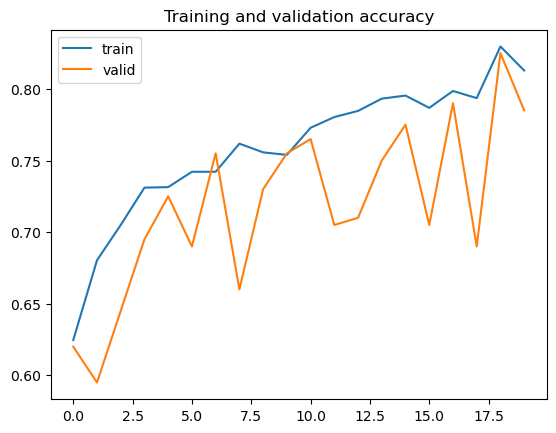

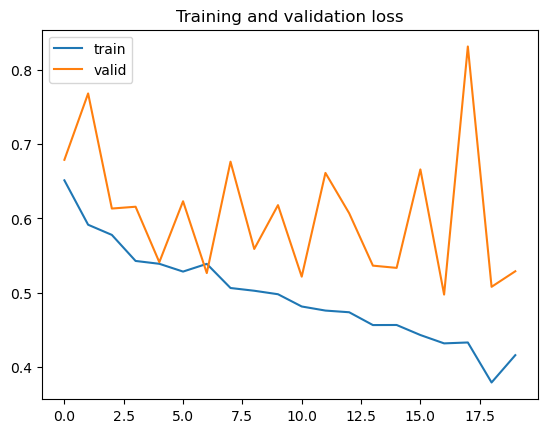

In [12]:
import matplotlib.pylab as plt

acc      = history['accuracy']
val_acc  = history['val_accuracy']
loss     = history['loss']
val_loss = history['val_loss']

epochs   = range(len(acc))

plt.plot(epochs, acc,label='train')
plt.plot(epochs, val_acc ,label='valid')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss,label='train')
plt.plot(epochs, val_loss,label='valid')
plt.title('Training and validation loss')
plt.legend()

In [13]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [4]:
from tensorflow.keras.models import load_model
model = load_model('model1.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
PREDICTION = yes
image --->


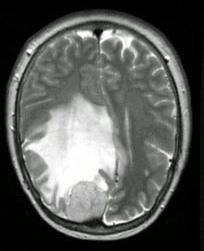

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image, display

path = r'path\dataset\test\yes\y106.jpg'
img = image.load_img(path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

classes = model.predict(x, batch_size=10)

# Use threshold for binary classification
if classes[0][0] > 0.5:
    print('PREDICTION = yes')
else:
    print('PREDICTION = no')

# Display the image
print('image --->')
display(Image(filename=path, width=128, height=128))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
PREDICTION = no
image --->


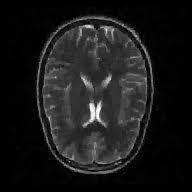

In [ ]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image, display

path = r'path\dataset\test\no\no1008.jpg'
img = image.load_img(path, target_size=(128, 128))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

classes = model.predict(x, batch_size=10)

# Use threshold for binary classification
if classes[0][0] > 0.5:
    print('PREDICTION = yes')
else:
    print('PREDICTION = no')

# Display the image
print('image --->')
display(Image(filename=path, width=128, height=128))


In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing import image
import os

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

image_dir = r"path\dataset\test\yes"
image_files = os.listdir(image_dir)

count_total = 0

results = []  # Store results here

for i in image_files:
    path = os.path.join(image_dir, i)
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize if your model expects this

    prediction = model.predict(x, batch_size=10)

    count_total += 1
    print(f"{count_total} done out of {len(image_files)}")

    if prediction[0][0] > 0.5:  # Use threshold for sigmoid
        results.append({'Img_name': i, 'Actual': 'yes', 'Prediction': 'yes'})
    else:
        results.append({'Img_name': i, 'Actual': 'yes', 'Prediction': 'no'})

# Convert list of dicts to DataFrame
df_yes = pd.DataFrame(results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
3 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
4 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
5 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
7 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
8 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
9 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
10 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
11 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
12 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
13 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
14 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
15 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
16 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
17 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━

In [27]:
df_yes

,Img_name,Actual,Prediction
0,y0.jpg,yes,yes
1,y1.jpg,yes,yes
2,y10.jpg,yes,yes
3,y100.jpg,yes,yes
4,y1000.jpg,yes,yes
5,y1001.jpg,yes,yes
6,y1002.jpg,yes,yes
7,y1003.jpg,yes,yes
8,y1004.jpg,yes,yes
9,y1005.jpg,yes,yes


In [28]:
count_total

1500

In [29]:
count_yes = df_yes['Prediction'].value_counts()['yes']
count_yes

1443

In [30]:
count_no = df_yes['Prediction'].value_counts()['no']
count_no

57

In [ ]:


image_dir = r"path\dataset\test\no"
image_files = os.listdir(image_dir)

k = len(image_files)

count_total2 = 0

data = {'Img_name': [], 'Actual': [], 'prediction': []}
df_no = pd.DataFrame(data)

for i in image_files:
    path = os.path.join(image_dir, i)  # Better than manual string concat
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize if model trained with normalization

    classes = model.predict(x, batch_size=10)
    count_total2 += 1
    print(count_total2, "done out of", k)

    if classes[0][0] > 0.5:
        df2 = {'Img_name': i, 'Actual': 'no', 'prediction': 'yes'}
    else:
        df2 = {'Img_name': i, 'Actual': 'no', 'prediction': 'no'}

    df_no.loc[len(df_no)] = df2  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
2 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
5 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
6 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
7 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
8 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
9 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
10 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
11 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
12 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
13 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
14 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
15 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
16 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
17 done out of 1500
1/1 ━━━━━━━━━━━━━━━━━━━

In [32]:
df_no

,Img_name,Actual,prediction
0,no0.jpg,no,no
1,no1.jpg,no,yes
2,no10.jpg,no,no
3,no100.jpg,no,no
4,no1000.jpg,no,no
5,no1001.jpg,no,yes
6,no1002.jpg,no,no
7,no1003.jpg,no,yes
8,no1004.jpg,no,no
9,no1005.jpg,no,no


In [33]:
count_yes2 = df_no['prediction'].value_counts()['yes']
count_yes2

503

In [34]:
count_no2 = df_no['prediction'].value_counts()['no']
count_no2

997

In [35]:
data = [[count_yes, count_no], [count_yes2, count_no2]]
summary = pd.DataFrame(data, columns = ['Guessed Positive', 'Guesses Negative'])
summary.index = ['Actual positive', 'Actual Negative']
summary

,Guessed Positive,Guesses Negative
Actual positive,1443,57
Actual Negative,503,997


In [36]:
recall = summary.iloc[0,0]/(summary.iloc[0,0]+summary.iloc[0,1])

In [37]:
recall

0.962

In [38]:
accuracy = (summary.iloc[0,0]+summary.iloc[1,1])/(summary.iloc[0,0]+summary.iloc[0,1]+summary.iloc[1,0]+summary.iloc[1,1])

In [39]:
accuracy

0.8133333333333334